In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('Titanic.csv')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)


In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data cleaning

There are 2 missing vakues in Embarked, 86 missing values in the Age column and 327 missing values in the Cabin column. To ensure more accurate analysis, it is essential to handle these missing values appropriately by filling them or removing them.

In [6]:
# Age

round(df['Age'].mean()) # getting the mean value of the age

df['Age'] = df['Age'].fillna(round(df['Age'].median())) # filling the NaN values with the mean value

df['Age'] = df['Age'].astype('int')# changing the data type of Age form float to int

In [7]:
# Cabin

#df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0]) # filling the NaN values with the mode value
# we can do this but , there wont be much use of this column later for further analysis as majority of the cabins are nan, 
#so instead we can just drop this column

df.drop('Cabin', axis=1 , inplace = True)

In [8]:
# Embarked

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Feature Engineering

 ### Create a new column to get the family size of the passenger.

In [9]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # here 1 means the passenger themselves

Doing this can help us analyze if there is any relation between family size and the survival rate

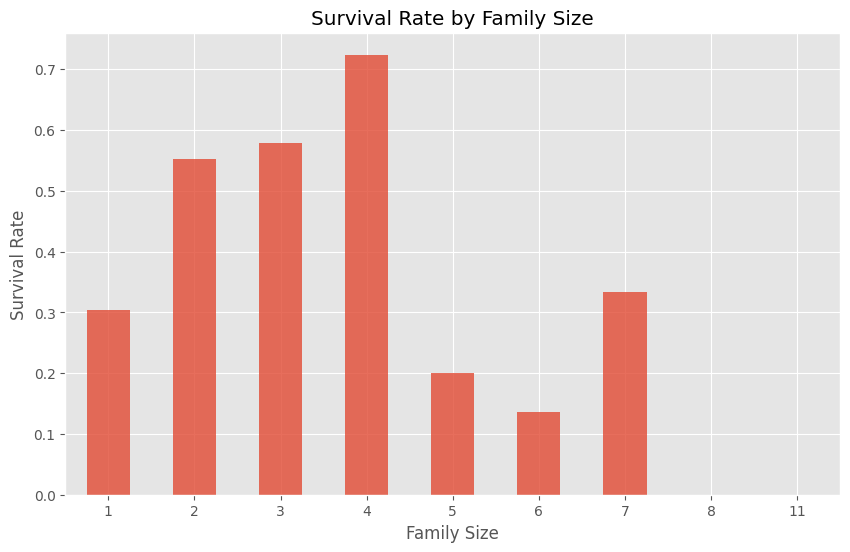

In [10]:
family_survival = df.groupby('FamilySize')['Survived'].mean()

# Bar plot
family_survival.plot(kind='bar', figsize=(10, 6), alpha = 0.8)
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation= 0)
plt.title('Survival Rate by Family Size')
plt.show()

Passengers with family sizes of 2 to 4 had a higher chance of survival, while larger families (5 or more members) faced significantly lower survival rates. This trend suggests that smaller family groups may have been easier to manage during evacuation, resulting in better survival outcomes.

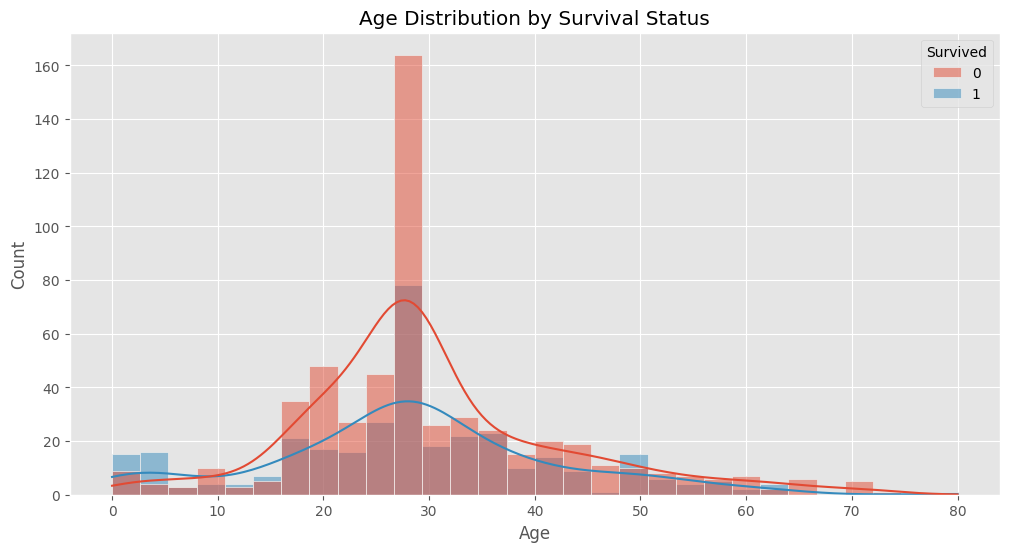

In [11]:
plt.figure(figsize=(12,6))
sns.histplot(data= df ,x ='Age', hue = 'Survived',kde= True, alpha=0.5)
plt.title('Age Distribution by Survival Status')
plt.show()

This histogram visualizes the distribution of ages for individuals categorized by survival status. The red bars and line represent the non-survivors (Survived = 0), while the blue bars and line represent the survivors (Survived = 1). The kernel density estimate (KDE) overlays provide a smoother representation of the age distribution for each survival category. Non-survivors tend to cluster around young adults (20–40 years), while survivors show a slightly broader distribution.

### Categorize age groups (child, teens, adults, seniors).

In [12]:
# using loops to iterate over all the rows and assign appropriate categorical age gropus.
df['AgeGroup'] = ''
for index , rows in df.iterrows():
    if rows['Age'] <= 12:
        df.at[index,'AgeGroup'] = 'Child'
    elif (rows['Age'] >12) & (rows['Age'] <= 19):
        df.at[index,'AgeGroup'] = 'Teen'
    elif (rows['Age'] >19) & (rows['Age'] <= 59):
        df.at[index,'AgeGroup'] = 'Adult'
    else:
        df.at[index,'AgeGroup'] = 'Senior'
        
df.insert(6, 'AgeGroup', df.pop('AgeGroup')) # poping the new column at the 6th index
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,AgeGroup,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
579,580,1,3,"Jussila, Mr. Eiriik",male,32,Adult,0,0,STON/O 2. 3101286,7.925,S,1


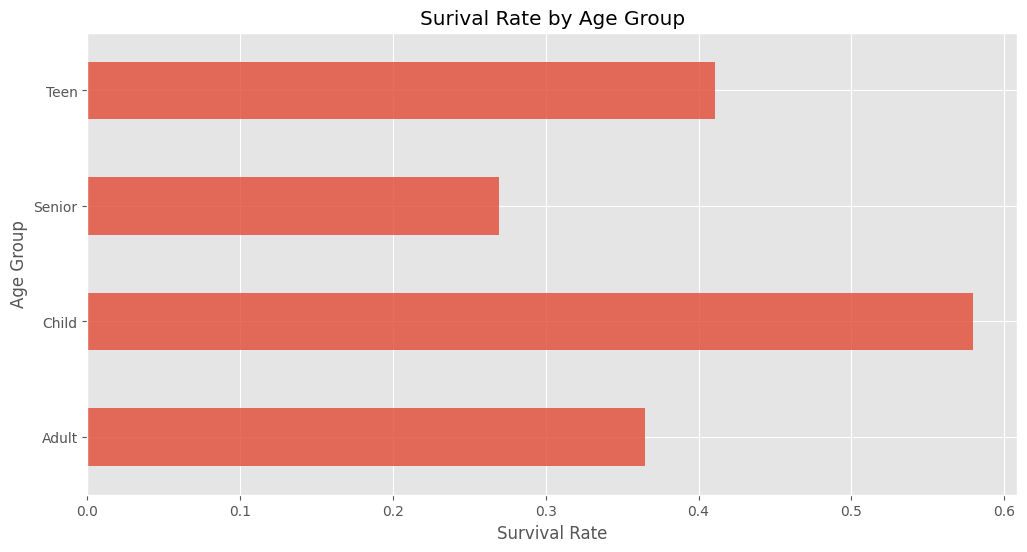

In [13]:
Age_survived = df.groupby('AgeGroup')['Survived'].mean()
Age_survived.plot(kind= 'barh', figsize=(12,6), alpha =0.8)
plt.title('Surival Rate by Age Group')
plt.xlabel('Survival Rate')
plt.ylabel('Age Group')
plt.show()

From this analysis, we can conclude that the Children age groups were prioritized the most, followed by the Teen age group and the Adult age group and lastly the senior age group.

### Creating a new column based on the passengers title

In [14]:
df['Title'] = df['Name'].str.split(",").str.get(1) #Getting the Title of each passangers

In [15]:
df['Title'] = df['Title'].str.split(".").str.get(0)

In [16]:
# Clean and standardize titles in the DataFrame
df['Title'] = df['Title'].str.strip()  # Remove leading/trailing spaces
df['Title'] = df['Title'].str.capitalize()  # Standardize capitalization

# Updated mapping with corrected keys
t = {
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Noble',
    'The countess': 'Noble',  # Fixed capitalization
    'Sir': 'Noble',
    'Don': 'Noble',
    'Jonkheer': 'Noble',
    'Col': 'Military',
    'Major': 'Military',
    'Capt': 'Military'
}

# Now mapping the titles 
df['Title'] = df['Title'].map(t).fillna(df['Title'])


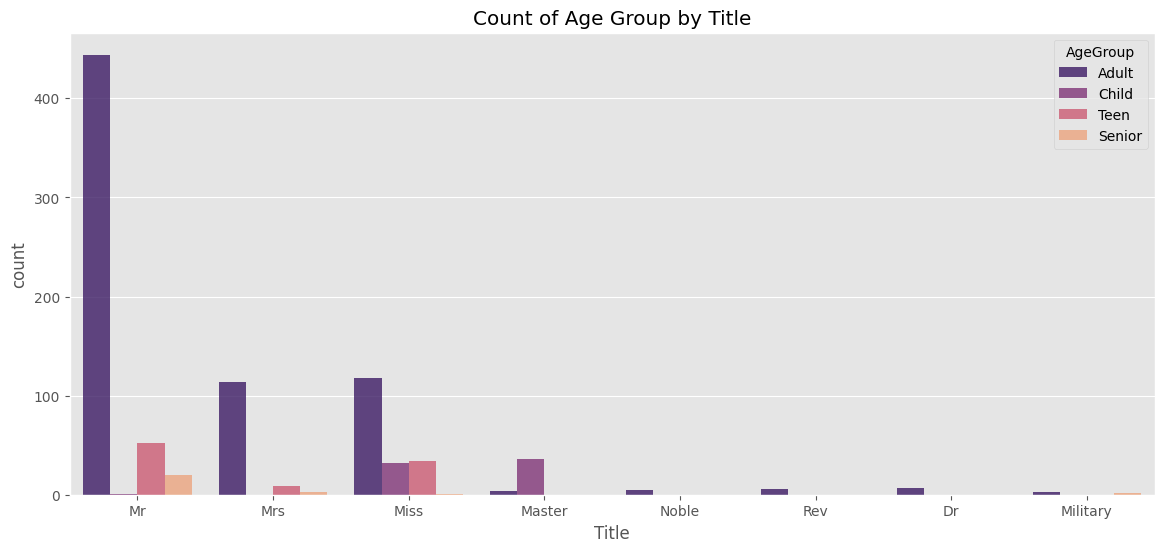

In [17]:
plt.figure(figsize=(14,6))
sns.countplot(data = df , x= 'Title', alpha=0.8, hue= 'AgeGroup', palette='magma')
plt.xticks(rotation = 0)
plt.title('Count of Age Group by Title')
plt.show()

The plot shows that most passengers were titled "Mr," followed by "Miss" and "Mrs," with adults dominating across all titles, while "Master" was common for children and rare titles like "Noble" and "Military" had minimal representation.

# Exploratory Data analysis (EDA)

### Survival Rate

In [68]:
survive = {
    0: 'Did not Survive',
    1: 'Survived'
}
df['SurvivedLabel'] = df['Survived'].map(survive)
df.insert(2, 'SurvivedLabel' ,df.pop('SurvivedLabel'))
df.sample()

,PassengerId,Survived,SurvivedLabel,Pclass,Name,Sex,Age,AgeGroup,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
794,795,0,Did not Survive,2,"Dantcheff, Mr. Ristiu",male,25,Adult,0,0,349203,7.8958,S,1,Mr


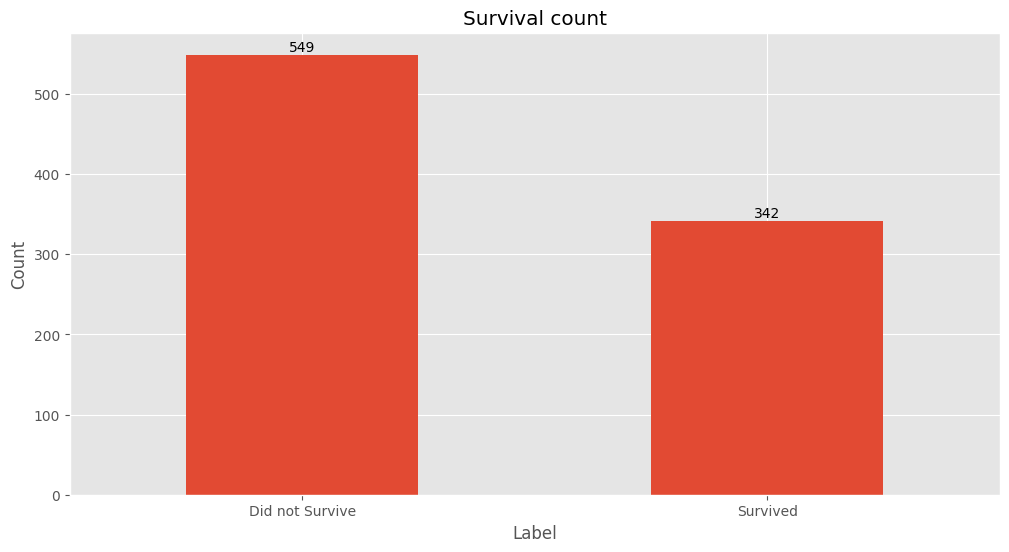

In [69]:
plt.figure(figsize=(12,6))
ax = df['SurvivedLabel'].value_counts().plot(kind = 'bar')
plt.title('Survival count')
plt.xticks(rotation = 0)
plt.xlabel('Label')
plt.ylabel('Count')

# showing the count of survived and not survived passengers.
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
    
plt.show()

### Survival Rate by Sex

In [70]:
df['Sex'].value_counts().reset_index()

,Sex,count
0,male,577
1,female,314


We can see that there were a total of 577 male population and 314 of female population. Now let us take a look at how many of them survived?

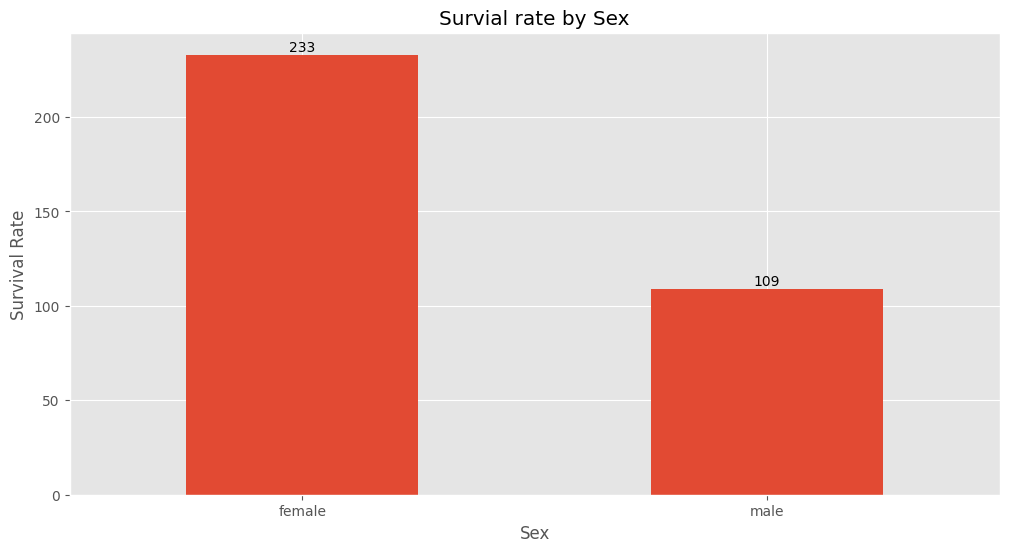

In [71]:
sex_survived = df.groupby(['Sex'])['Survived'].sum()
ax = sex_survived.plot(kind ='bar', figsize=(12,6))
plt.title('Survial rate by Sex')

plt.xlabel('Sex')
plt.xticks(rotation = 0)
plt.ylabel('Survival Rate')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()

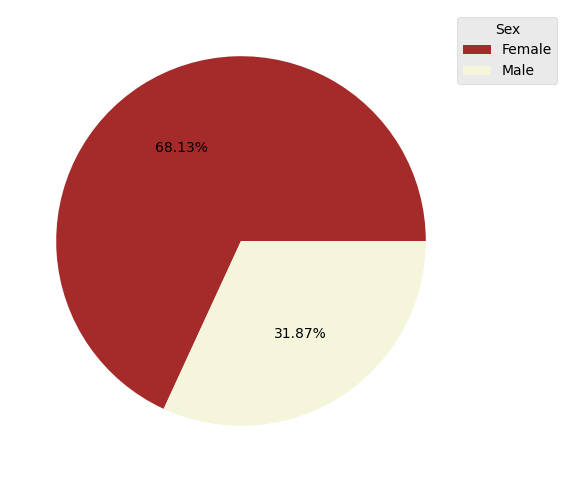

In [72]:
gender= ['Female','Male']
plt.figure(figsize=(12,6))
sex_survived.plot(kind = 'pie', labels=None ,autopct ='%1.2f%%',colors = ['brown','beige'] )
plt.legend(labels= gender,loc='upper right', bbox_to_anchor=(1,0,0.2,1), title = 'Sex',)
plt.ylabel(None)
plt.show()

As seen in the bar plot and pie chart the males survivirs are comparitively less than the females. Specifically, 68.13% of the people who survived were females, while the remaining 31.87% were `males. This suggests that the females were given more priority than the males

### Survival Rate based on title

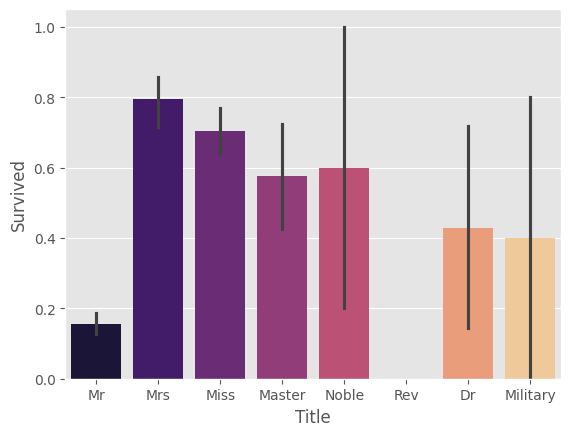

In [73]:
sns.barplot(data=df , x= 'Title', y='Survived' , palette = 'magma')
plt.show()

This bar plot shows survival rates by title, likely from Titanic data. Women, especially those titled "Mrs" and "Miss," had the highest survival rates, while "Mr" had the lowest, highlighting gender disparities. Titles like "Master" and "Noble" had moderate survival rates, possibly reflecting social status advantages. Wide error bars for "Rev," "Dr," and "Military" suggest smaller sample sizes or variability. Gender and societal roles strongly influenced survival.

### Survival Rate by ticket class and sex

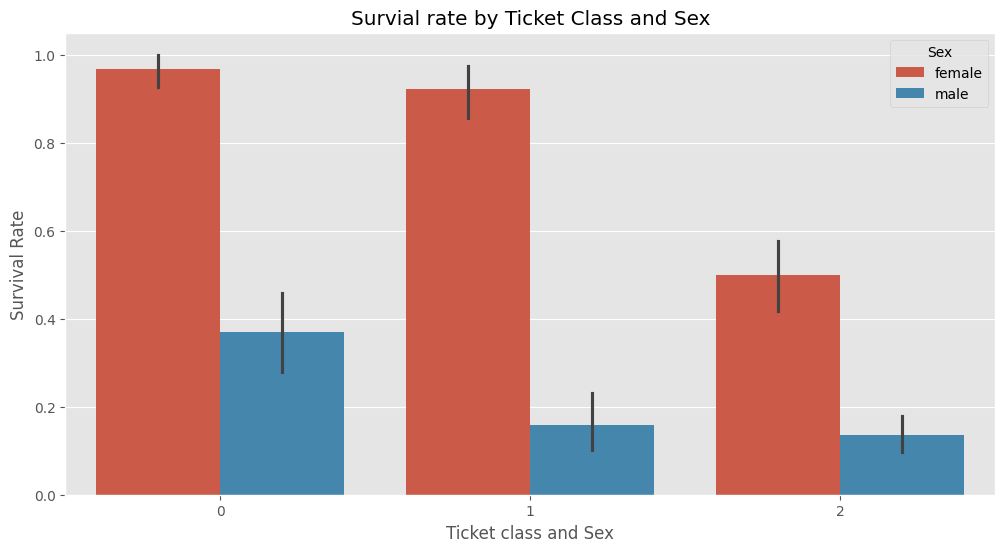

In [74]:
plt.figure(figsize=(12,6))
sns.barplot(df , x='Pclass', y='Survived',hue = 'Sex')
plt.title('Survial rate by Ticket Class and Sex')
plt.xlabel('Ticket class and Sex')
plt.xticks(rotation = 0)
plt.ylabel('Survival Rate')
plt.show()

From this bar plot, it is evident that 1st class ticket holders had a significantly higher survival rate compared to 2nd and 3rd class ticket holders, indicating that passengers in higher classes were given greater priority during evacuation. Additionally, the survival rate of females was consistently higher across all ticket classes, suggesting that sex played a crucial role in survival, regardless of class. This highlights the impact of class and gender in determining survival chances during the Titanic disaster.

### Distribution of age

In [75]:
df['Age'].value_counts().reset_index().head(5)

,Age,count
0,28,204
1,24,31
2,22,27
3,30,27
4,18,26


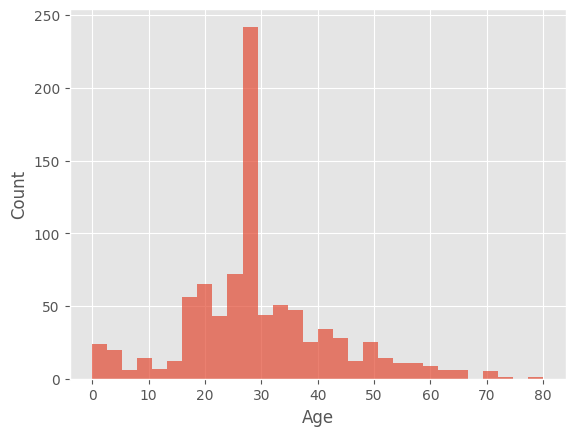

In [76]:
plt.hist(df['Age'], bins=30, alpha = 0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

This histogram suggests that the majority of the population was between the ages of 20 and 30, with the highest count observed at age 30.

### Fare Distribution

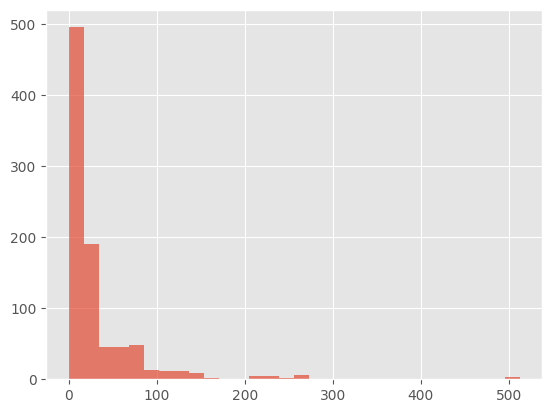

In [77]:
plt.hist(df['Fare'], bins=30, alpha = 0.7)
plt.show()

As we can see in the above histogram, majority of the fare distribution falls toward the 0-100 range, we cannot conclude anything from this as it is not very clear whether the fare was actally 0 or not. So we can further disect the histogram for more precise interpretation.

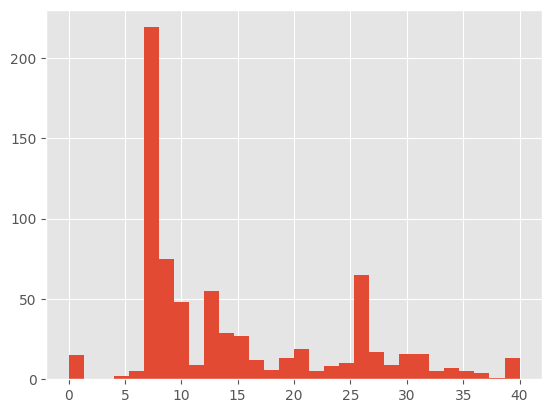

In [78]:
# disecting the histogram to a range of 0 to 40

plt.hist(df['Fare'], bins=30, range=[0, 40])
plt.show()

Now we can see that the majority of the fare distribution ranged from 5 to 10 dollars with some passengers boarding the ship without paying any fare at all.

### Age distribution Across Passenger Classes on the Titanic

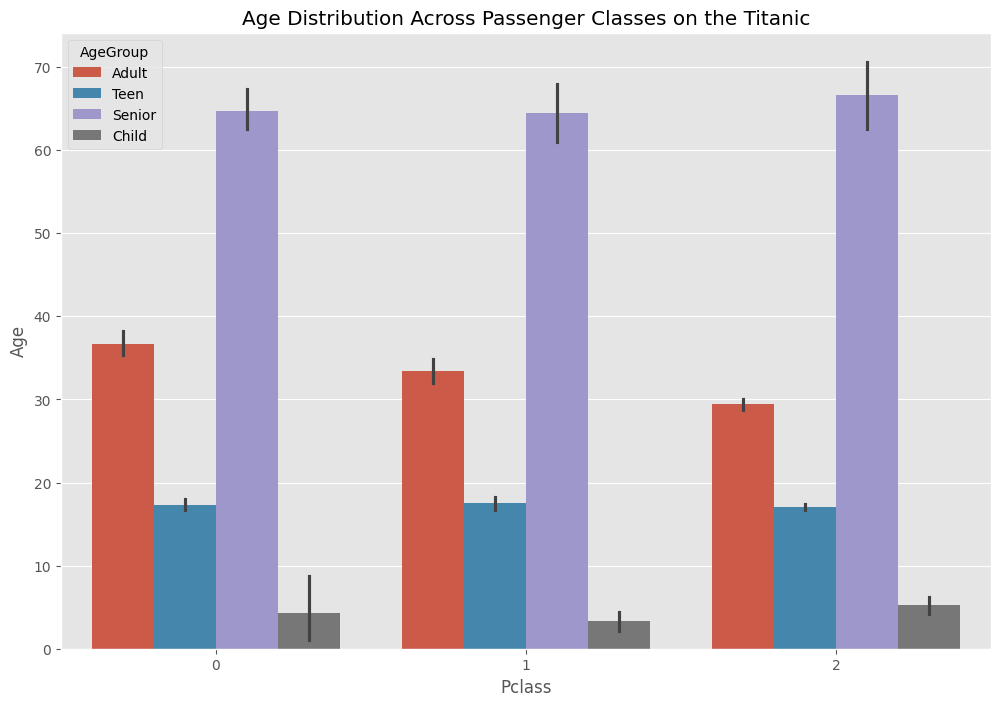

In [79]:
plt.figure(figsize=(12,8))
sns.barplot(x= 'Pclass', y = 'Age', hue = 'AgeGroup', data = df)
plt.title('Age Distribution Across Passenger Classes on the Titanic')
plt.show()

The bar plot shows age group variations across passenger classes on the Titanic. In every class, the Senior group is the largest, followed by Adults, then Teens, and finally Children.

# Machine learing for making predictions 

## train test split

In [80]:
df.sample()

,PassengerId,Survived,SurvivedLabel,Pclass,Name,Sex,Age,AgeGroup,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
356,357,1,Survived,0,"Bowerman, Miss. Elsie Edith",female,22,Adult,0,1,113505,55.0,S,2,Miss


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X = df[['Pclass','Sex','Age','FamilySize','Fare','Title']]
y = df['Survived']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    

In [84]:
X_train.shape , X_test.shape

((712, 6), (179, 6))

## Preprocessing

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder, LabelEncoder

In [86]:
df['Title'].value_counts()

Title
Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Noble         5
Military      5
Name: count, dtype: int64

### First Define Transformer

In [87]:
# label Encoder is applied separately before the ColumnTransformer.

df['Pclass'] = LabelEncoder().fit_transform(df['Pclass'])


In [88]:
# OneHotEncoder is used for categorical columns (Sex and Title).
# MinMaxScaler is used for numerical features (Age and Fare).

transformer = ColumnTransformer(transformers=[
    ('cate_sex', OneHotEncoder(categories=[['male','female']]),['Sex']),
    ('cate_title', OneHotEncoder(categories=[['Mr','Miss','Mrs','Master','Dr','Rev','Noble','Military']]),['Title']),
    ('num', StandardScaler(),['Age','Fare'])
],remainder='passthrough')

###  Second Apply(fit) and Transform the dataframe

In [89]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

## Apply algorithm

In [90]:
from sklearn.linear_model import LogisticRegression 

In [91]:
model = LogisticRegression()

In [92]:
model.fit(X_train_transformed,y_train)

LogisticRegression()

## Make predictions

In [93]:
y_pred = model.predict(X_test_transformed)

## Model Evaluation 

In [94]:
from sklearn.metrics import confusion_matrix, classification_report

In [95]:
classification = classification_report(y_test,y_pred)
print('Classification Report:')
print(classification)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



The classification report shows that the model has an overall accuracy of 80%, with better performance in predicting non-survivors (class 0). For non-survivors, the model achieves a precision of 0.82, recall of 0.85, and an F1-score of 0.83. For survivors (class 1), the model's performance is slightly weaker, with a precision of 0.77, recall of 0.73, and an F1-score of 0.75. The macro and weighted averages (0.79-0.80) suggest a generally balanced model, but there is room for improvement in predicting survivors more accurately.

In [101]:
matrix = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(matrix)

Confusion Matrix:
[[89 16]
 [20 54]]


The confusion matrix shows how well the model classifies non-survivors (class 0) and survivors (class 1). In the first row, which represents actual non-survivors (class 0), 89 are correctly predicted as non-survivors (True Negatives), while 16 are incorrectly predicted as survivors (False Positives). In the second row, which represents actual survivors (class 1), 20 are mistakenly predicted as non-survivors (False Negatives), and 54 are correctly predicted as survivors (True Positives). This indicates that the model is somewhat better at predicting non-survivors but has moderate issues with false positives and false negatives, suggesting areas for improvement, especially in identifying survivors.

## Conclusion 

To clarify, out of the 891 total data points, 20% (179 data points) were used for testing, while the remaining 80% (712 data points) were used for training the model. After training and evaluating the model on the testing data, the model achieved an accuracy of 80%, which is considered a decent performance level. The evaluation of the model is based on the comparison between the actual labels in the testing data and the predictions made by the model, allowing us to assess how well it generalizes to unseen data.

# Adding a new Model For Comparison 

'Logistic Regression Model' are Great for understanding linear relationships between the features and the outcome. However it is not able to capture non-linear relationships. So that is why 'Random Forest Model' is used to capture non-linear relationships and interactions between features that Logistic Regression might miss.

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [98]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_transformed, y_train)
y_pred_rf = rf.predict(X_test_transformed)

## Comparision 

In [102]:
# Model evaluation

def evaluate_model(model_name, y_test, y_pred):
    print(f"{model_name} Performance:")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("-" * 50)

In [103]:
evaluate_model("Logistic Regression", y_test, y_pred)
evaluate_model("Random Forest", y_test, y_pred_rf)

Logistic Regression Performance:

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 0.7988826815642458
Precision: 0.7714285714285715
Recall: 0.7297297297297297
F1 Score: 0.75
--------------------------------------------------
Random Forest Performance:

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Accuracy: 0.8268156424581006
Precision: 0.7866666666666666
Recall: 0.797297297297297

The evaluation results for both models show their performance on the testing data (179 data points).

Logistic Regression achieved an accuracy of 80%, with precision of 0.77, recall of 0.73, and an F1 score of 0.75. The model performed better at predicting non-survivors (class 0), but had a moderate recall for survivors (class 1), indicating potential room for improvement.

Random Forest outperformed the logistic regression model with an accuracy of 83%, precision of 0.79, recall of 0.80, and an F1 score of 0.79. The Random Forest model was better balanced in predicting both survivors and non-survivors, making it a more reliable choice for this task.



### In summary, the Random Forest model showed better overall performance across all metrics, with higher accuracy, precision, and recall compared to Logistic Regression.